In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [14]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [15]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Columns: 122 entries, ID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 200.4+ MB


,ID,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,215258.00000,215258.000000,215258.000000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000,215258.000000,215258.000000,...,215258.000000,215258.000000,215258.000000,215258.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000
mean,107628.50000,0.080731,0.417076,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,0.020869,-16037.328169,63865.074181,...,0.008037,0.000562,0.000483,0.000325,0.006494,0.007240,0.034369,0.265761,0.264515,1.894777
std,62139.77646,0.272422,0.723197,2.745586e+05,4.027798e+05,14531.196505,3.698069e+05,0.013834,4369.585911,141314.891126,...,0.089288,0.023702,0.021975,0.018030,0.085314,0.114952,0.206392,0.909921,0.611392,1.866564
min,0.00000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17546.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53814.25000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19688.000000,-2757.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107628.50000,0.000000,0.000000,1.440000e+05,5.135310e+05,24925.500000,4.500000e+05,0.018850,-15747.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,161442.75000,0.000000,1.000000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,0.028663,-12405.250000,-287.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,215257.00000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,8.000000,25.000000


## 5. Data Exploring

### * Các Biến dữ liệu

Đánh giá Khu vực:
- REGION_RATING_CLIENT : Đánh giá của tổ chức về khu vực thường trú của khách hàng (1,2,3) (1: Tốt nhất, 3: Xấu nhất).
- REGION_RATING_CLIENT_W_CITY : Đánh giá của tổ chức về khu vực thường trú, có tính đến thành phố (1,2,3) (1: Tốt nhất, 3: Xấu nhất).

Địa lý :
- REG_REGION_NOT_LIVE_REGION : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ liên hệ (cấp vùng/tỉnh). (1=Khác, 0=Giống)
- REG_REGION_NOT_WORK_REGION : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ làm việc (cấp vùng/tỉnh). (1=Khác, 0=Giống)
- LIVE_REGION_NOT_WORK_REGION : Cờ cho biết địa chỉ liên hệ không khớp với địa chỉ làm việc (cấp vùng/tỉnh). (1=Khác, 0=Giống)
- REG_CITY_NOT_LIVE_CITY : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ liên hệ (cấp thành phố). (1=Khác, 0=Giống)
- REG_CITY_NOT_WORK_CITY : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ làm việc (cấp thành phố). (1=Khác, 0=Giống)
- LIVE_CITY_NOT_WORK_CITY : Cờ cho biết địa chỉ liên hệ không khớp với địa chỉ làm việc (cấp thành phố). (1=Khác, 0=Giống)

(==> Khách hàng thay đổi địa chỉ nhiều → rủi ro cao hơn (tính ổn định thấp).)

Nguồn ngoại vi:
- EXT_SOURCE_1/2/3 : Điểm số chuẩn hóa từ Nguồn dữ liệu bên ngoài 1/2/3 (Thường là điểm tín dụng từ các tổ chức khác).

Thông tin nhà ở:
- FONDKAPREMONT_MODE : Loại tài khoản ngân hàng liên quan đến quỹ bảo trì/cải tạo (ví dụ: liên quan đến nhà chung cư).
- HOUSETYPE_MODE : Loại hình nhà ở.
- TOTALAREA_MODE : Thông tin chuẩn hóa về tòa nhà khách hàng đang sống (diện tích chung).
- WALLSMATERIAL_MODE : Vật liệu tường của nhà ở.
- EMERGENCYSTATE_MODE : Tình trạng khẩn cấp của tòa nhà (ví dụ: cần cải tạo khẩn cấp)( Có/Không)

Vòng tròn xã hội:
- OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE : Số lượng quan sát trong vòng tròn xã hội của khách hàng có khả năng mắc nợ quá hạn 30/60 ngày (DPD).
- DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE : Số lượng quan sát trong vòng tròn xã hội của khách hàng đã thực sự mắc nợ quá hạn 30/60 ngày (DPD).

( Các biến này đo lường mức độ rủi ro tín dụng của những người xung quanh khách hàng (ví dụ: bạn bè, người cùng địa chỉ) được tổ chức cho vay theo dõi. Đây là một yếu tố quan trọng trong một số mô hình chấm điểm tín dụng, vì hành vi tài chính của những người xung quanh có thể gián tiếp phản ánh môi trường tài chính và rủi ro của người vay.)

In [ ]:
cols_social = [
    "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"
]

df_social = df_train[cols_social].copy()   

# Xử lý Missing bằng SimpleImputer
imputer = SimpleImputer(strategy='median')
df_social_simpleimputer = pd.DataFrame(imputer.fit_transform(df_social), columns=cols_social)



In [24]:
# Xử lý Missing bằng KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df_social_knn = pd.DataFrame(imputer_knn.fit_transform(df_social), columns=cols_social)


In [29]:
df_train["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

DEF_60_CNT_SOCIAL_CIRCLE
0.0     196500
1.0      15271
2.0       2263
NaN        712
3.0        406
4.0         90
5.0         13
7.0          1
6.0          1
24.0         1
Name: count, dtype: int64

In [30]:
def cap_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    return series.clip(lower, upper)

In [4]:
# Chọn một số cột để phân tích
feature_list = [
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]
df_sub = df_train[feature_list].copy()

In [5]:
# Phân loại cột số và cột danh mục
num_cols = df_sub.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_sub.select_dtypes(include=["object"]).columns

print("Cột số:", len(num_cols), ":", num_cols)
print("Cột danh mục:", len(cat_cols), ":", cat_cols)

Cột số: 16 : Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')
Cột danh mục: 4 : Index(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


In [6]:
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns

In [7]:

# Tính toán ma trận tương quan giữa biến số và TARGET
corr = df_train[num_cols.tolist() + ['TARGET']].corr()
corr



,ID,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
ID,1.000000,-0.002793,-0.002372,-0.002348,0.001437,0.002173,0.001275,0.001061,-0.003030,0.003323,...,-0.002976,-0.001169,0.000027,-0.002055,0.000248,0.004887,-0.003180,0.000360,0.003850,-0.002793
TARGET,-0.002793,1.000000,0.020044,-0.001546,-0.030230,-0.012055,-0.039488,-0.037715,0.077842,-0.044176,...,0.000167,-0.000307,0.003167,0.000865,0.002440,0.000294,-0.014481,-0.001773,0.019474,1.000000
CNT_CHILDREN,-0.002372,0.020044,1.000000,0.012380,0.001516,0.022286,-0.002385,-0.025919,0.330485,-0.239999,...,-0.001752,-0.000110,-0.001495,0.000751,-0.000200,-0.001123,-0.012180,-0.012060,-0.038949,0.020044
AMT_INCOME_TOTAL,-0.002348,-0.001546,0.012380,1.000000,0.136123,0.166704,0.138466,0.064725,0.023661,-0.056127,...,0.002404,0.000174,-0.000115,0.000582,0.002179,0.001485,0.021243,0.004049,0.009641,-0.001546
AMT_CREDIT,0.001437,-0.030230,0.001516,0.136123,1.000000,0.770234,0.986925,0.099116,-0.056322,-0.067363,...,0.020583,0.030140,-0.015535,-0.002601,0.004217,-0.001788,0.054633,0.020694,-0.048614,-0.030230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0.004887,0.000294,-0.001123,0.001485,-0.001788,0.013697,-0.001065,-0.004568,0.000248,0.001818,...,0.000235,-0.000633,0.000061,0.005627,0.239666,1.000000,-0.013545,-0.019351,0.018422,0.000294
AMT_REQ_CREDIT_BUREAU_MON,-0.003180,-0.014481,-0.012180,0.021243,0.054633,0.039341,0.056405,0.078080,0.000158,-0.033794,...,-0.001757,-0.000659,-0.003762,-0.000159,-0.004839,-0.013545,1.000000,-0.010036,-0.006370,-0.014481
AMT_REQ_CREDIT_BUREAU_QRT,0.000360,-0.001773,-0.012060,0.004049,0.020694,0.014870,0.020839,-0.004679,-0.014772,0.018120,...,-0.000396,-0.000933,-0.000541,-0.004098,-0.005087,-0.019351,-0.010036,1.000000,0.100681,-0.001773
AMT_REQ_CREDIT_BUREAU_YEAR,0.003850,0.019474,-0.038949,0.009641,-0.048614,-0.012952,-0.051186,0.000639,-0.072448,0.050326,...,-0.006682,-0.013525,-0.006251,-0.006637,-0.005661,0.018422,-0.006370,0.100681,1.000000,0.019474


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("train.csv")

ext_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

df_ext = df[ext_cols].copy()

In [ ]:
# HÀM XỬ LÝ OUTLIER BẰNG IQR (áp dụng cho 3 biến cùng lúc)
def cap_iqr_df(df):
    df_out = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR
        df_out[col] = df[col].clip(lower, upper)
    return df_out

df_ext_capped = cap_iqr_df(df_ext)
df_ext_capped

Xử lí missing

In [ ]:
# 1. HÀM IMPUTE THEO SIMPLE (mean / median / 0)
def simple_impute(df, strategy="mean"):
    imp = SimpleImputer(strategy=strategy)
    arr = imp.fit_transform(df)
    return pd.DataFrame(arr, columns=[c + f"_simple_{strategy}" for c in df.columns])

df_ext_mean = simple_impute(df_ext_capped, strategy="mean")
df_ext_median = simple_impute(df_ext_capped, strategy="median")

# Check mising 

In [6]:
def simple_impute_zero(df):
    imp = SimpleImputer(strategy="constant", fill_value=0)
    arr = imp.fit_transform(df)
    return pd.DataFrame(arr, columns=[c + "_simple_0" for c in df.columns])

df_ext_zero = simple_impute_zero(df_ext_capped)

In [7]:
# 2. HÀM IMPUTE THEO KNN
def knn_impute(df, k=5):
    knn = KNNImputer(n_neighbors=k)
    arr = knn.fit_transform(df)
    return pd.DataFrame(arr, columns=[c + "_knn" for c in df.columns])

df_ext_knn = knn_impute(df_ext_capped)

KeyboardInterrupt: 

Gộp lại thành 1 feature

In [8]:
# --- Cách 1: Mean score ---
def combine_mean(df):
    df_out = df.copy()
    df_out["EXT_SOURCE_MEAN"] = df.mean(axis=1)
    return df_out[["EXT_SOURCE_MEAN"]]


In [9]:
# --- Cách 2: PCA 1 component ---
def combine_pca(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    pca = PCA(n_components=1)
    comp = pca.fit_transform(X_scaled)

    return pd.DataFrame(comp, columns=["EXT_SOURCE_PCA1"])


In [10]:
# --- Cách 3 (optional): weighted average ---
def combine_weight(df, w1=0.2, w2=0.5, w3=0.3):
    weights = np.array([w1, w2, w3])
    new_col = df.values.dot(weights)
    return pd.DataFrame(new_col, columns=["EXT_SOURCE_WEIGHTED"])

In [12]:

df_for_combine = df_ext_mean.copy()

df_mean_feature = combine_mean(df_for_combine)
df_pca_feature = combine_pca(df_for_combine)
df_weight_feature = combine_weight(df_for_combine)

In [13]:
df_mean_feature

,EXT_SOURCE_MEAN
0,0.580557
1,0.436772
2,0.501532
3,0.410408
4,0.561998
...,...
215253,0.543151
215254,0.556326
215255,0.489764
215256,0.489600


In [8]:
import pandas as pd

ext_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

# Lọc chỉ các biến numeric để tính correlation
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns

for col in ext_cols:
    print(f"\n===== Top 10 biến tương quan mạnh nhất với {col} =====")
    
    # Tính correlation của col với toàn bộ biến numeric
    corr_series = df_train[num_cols].corr()[col].dropna()
    
    # Sắp xếp theo độ lớn tuyệt đối
    top10 = corr_series.abs().sort_values(ascending=False).head(11)  # 11 vì sẽ bao gồm chính nó
    top10 = top10.drop(labels=[col])  # bỏ chính biến EXT_SOURCE_i
    
    print(top10.head(10))



===== Top 10 biến tương quan mạnh nhất với EXT_SOURCE_1 =====
DAYS_BIRTH                0.602214
FLAG_EMP_PHONE            0.295029
DAYS_EMPLOYED             0.290832
EXT_SOURCE_2              0.216783
FLAG_DOCUMENT_6           0.188917
REG_CITY_NOT_WORK_CITY    0.186745
EXT_SOURCE_3              0.185953
DAYS_REGISTRATION         0.179913
AMT_GOODS_PRICE           0.173135
AMT_CREDIT                0.166229
Name: EXT_SOURCE_1, dtype: float64

===== Top 10 biến tương quan mạnh nhất với EXT_SOURCE_2 =====
REGION_RATING_CLIENT           0.294161
REGION_RATING_CLIENT_W_CITY    0.289367
EXT_SOURCE_1                   0.216783
REGION_POPULATION_RELATIVE     0.199426
DAYS_LAST_PHONE_CHANGE         0.196295
TARGET                         0.160295
HOUR_APPR_PROCESS_START        0.158625
AMT_GOODS_PRICE                0.139660
FLOORSMAX_AVG                  0.135685
FLOORSMAX_MEDI                 0.134406
Name: EXT_SOURCE_2, dtype: float64

===== Top 10 biến tương quan mạnh nhất với EXT_SOURCE

In [9]:

social_circle = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]


# Lọc chỉ các biến numeric để tính correlation
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns

for cor in social_circle:
    print(f"\n===== Top 10 biến tương quan mạnh nhất với {cor} =====")
    
    # Tính correlation của col với toàn bộ biến numeric
    corr_series = df_train[num_cols].corr()[cor].dropna()
    
    # Sắp xếp theo độ lớn tuyệt đối
    top10 = corr_series.abs().sort_values(ascending=False).head(11)  # 11 vì sẽ bao gồm chính nó
    top10 = top10.drop(labels=[cor])  # bỏ chính biến EXT_SOURCE_i
    
    print(top10.head(10))



===== Top 10 biến tương quan mạnh nhất với OBS_30_CNT_SOCIAL_CIRCLE =====
OBS_60_CNT_SOCIAL_CIRCLE    0.998549
DEF_30_CNT_SOCIAL_CIRCLE    0.339152
DEF_60_CNT_SOCIAL_CIRCLE    0.262581
FLOORSMAX_AVG               0.036288
FLOORSMAX_MEDI              0.035977
REGION_RATING_CLIENT        0.034920
FLOORSMAX_MODE              0.034694
FLAG_PHONE                  0.033622
FLOORSMIN_MEDI              0.033554
FLOORSMIN_AVG               0.033346
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

===== Top 10 biến tương quan mạnh nhất với DEF_30_CNT_SOCIAL_CIRCLE =====
DEF_60_CNT_SOCIAL_CIRCLE    0.859903
OBS_60_CNT_SOCIAL_CIRCLE    0.341296
OBS_30_CNT_SOCIAL_CIRCLE    0.339152
EXT_SOURCE_3                0.034142
TARGET                      0.033007
EXT_SOURCE_2                0.030364
FLAG_PHONE                  0.028523
EXT_SOURCE_1                0.025436
AMT_ANNUITY                 0.023306
FLOORSMAX_AVG               0.023185
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

===== Top 10 bi

### * Check duplicate khách hàng

In [10]:
# Kiểm tra duplicate theo ID
print("Số khách hàng bị duplicate:", df_train['ID'].duplicated().sum())


Số khách hàng bị duplicate: 0


### * Kiểm tra missing data, phân nhóm theo tỷ lệ

In [11]:
missing = df_sub.isnull().mean().sort_values(ascending=False)
print("Tỷ lệ missing value từng biến (%):\n", (missing*100).round(2))

# Phân nhóm theo threshold
print("Biến missing < 5%:", missing[missing < 0.05].index.tolist())
print("Biến missing 5-30%:", missing[(missing >= 0.05) & (missing < 0.3)].index.tolist())
print("Biến missing > 30%:", missing[missing >= 0.3].index.tolist())

Tỷ lệ missing value từng biến (%):
 FONDKAPREMONT_MODE             68.39
EXT_SOURCE_1                   56.41
WALLSMATERIAL_MODE             50.87
HOUSETYPE_MODE                 50.22
TOTALAREA_MODE                 48.29
EMERGENCYSTATE_MODE            47.41
EXT_SOURCE_3                   19.86
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.22
REGION_RATING_CLIENT_W_CITY     0.00
LIVE_CITY_NOT_WORK_CITY         0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
REGION_RATING_CLIENT            0.00
dtype: float64
Biến missing < 5%: ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'RE

Có 3 loại missing data:
- MCAR (Missing Completely At Random): Thiếu ngẫu nhiên, không liên quan đến giá trị nào khác.
- MAR (Missing At Random): Thiếu liên quan đến các biến khác.
- MNAR (Missing Not At Random): Thiếu liên quan đến chính biến đó.

Đề xuất phương pháp xử lý phù hợp: loại bỏ, điền giá trị trung bình/median/mode, hoặc gắn nhãn riêng.

In [9]:
# Danh sách các features ngoại lệ không bị drop
exception_features = [
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]
# Drop các biến missing > 30% trừ các biến ngoại lệ
to_drop = missing[missing >= 0.3].index.difference(exception_features)
df_sub.drop(columns=to_drop, inplace=True)

print("Các cột đã bị drop:", to_drop)
df_sub.info()


Các cột đã bị drop: Index(['EMERGENCYSTATE_MODE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   REGION_RATING_CLIENT         215258 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY  215258 non-null  int64  
 2   REG_REGION_NOT_LIVE_REGION   215258 non-null  int64  
 3   REG_REGION_NOT_WORK_REGION   215258 non-null  int64  
 4   LIVE_REGION_NOT_WORK_REGION  215258 non-null  int64  
 5   REG_CITY_NOT_LIVE_CITY       215258 non-null  int64  
 6   REG_CITY_NOT_WORK_CITY       215258 non-null  int64  
 7   LIVE_CITY_NOT_WORK_CITY      215258 non-null  int64  
 8   EXT_SOURCE_1                 93829 non-null   float64
 9   EXT_SOURCE_2                 214783 non-null  float64
 10  EXT_SOURCE_3    

In [10]:
# Check lại tỷ lệ missing của các biến EXT_SOURCE

cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Missing từng biến
missing_each = df_train[cols].isna().sum()

# Missing theo cặp
cond_12_not3 = df_train['EXT_SOURCE_1'].isna() & df_train['EXT_SOURCE_2'].isna() & df_train['EXT_SOURCE_3'].notna()
cond_13_not2 = df_train['EXT_SOURCE_1'].isna() & df_train['EXT_SOURCE_3'].isna() & df_train['EXT_SOURCE_2'].notna()
cond_23_not1 = df_train['EXT_SOURCE_2'].isna() & df_train['EXT_SOURCE_3'].isna() & df_train['EXT_SOURCE_1'].notna()

# Missing cả 3
cond_all3 = df_train[cols].isna().all(axis=1)

# Không missing biến nào
cond_none = df_train[cols].notna().all(axis=1)

# Missing đúng 1 biến
cond_only_1 = df_train['EXT_SOURCE_1'].isna() & df_train['EXT_SOURCE_2'].notna() & df_train['EXT_SOURCE_3'].notna()
cond_only_2 = df_train['EXT_SOURCE_2'].isna() & df_train['EXT_SOURCE_1'].notna() & df_train['EXT_SOURCE_3'].notna()
cond_only_3 = df_train['EXT_SOURCE_3'].isna() & df_train['EXT_SOURCE_1'].notna() & df_train['EXT_SOURCE_2'].notna()

# Tạo bảng tổng hợp
summary = pd.DataFrame({
    'Missing_EXT_SOURCE_1': [missing_each['EXT_SOURCE_1']],
    'Missing_EXT_SOURCE_2': [missing_each['EXT_SOURCE_2']],
    'Missing_EXT_SOURCE_3': [missing_each['EXT_SOURCE_3']],

    'Missing_1_2_not_3': [cond_12_not3.sum()],
    'Missing_1_3_not_2': [cond_13_not2.sum()],
    'Missing_2_3_not_1': [cond_23_not1.sum()],

    'Missing_all_3': [cond_all3.sum()],
    'Not_missing_all_3': [cond_none.sum()],

    'Missing_only_1': [cond_only_1.sum()],
    'Missing_only_2': [cond_only_2.sum()],
    'Missing_only_3': [cond_only_3.sum()],
})

summary


,Missing_EXT_SOURCE_1,Missing_EXT_SOURCE_2,Missing_EXT_SOURCE_3,Missing_1_2_not_3,Missing_1_3_not_2,Missing_2_3_not_1,Missing_all_3,Not_missing_all_3,Missing_only_1,Missing_only_2,Missing_only_3
0,121429,475,42748,195,25529,41,129,76629,95576,110,17049


In [11]:
# Xử lí missing cho biến EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chuẩn bị dữ liệu cho PCA
ext_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Tạo một DataFrame/Subset chỉ chứa các biến EXT_SOURCE
df_ext = df_sub[ext_features].copy()

# 1. Impute bằng Median cho các biến EXT_SOURCE
for col in ext_features:
    df_ext[col].fillna(df_ext[col].median(), inplace=True)

# Kiểm tra lại: df_ext.isnull().sum() phải bằng 0
print(df_ext.isnull().sum())

# 2. Scaling (Chuẩn hóa) dữ liệu
scaler = StandardScaler()
df_ext_scaled = scaler.fit_transform(df_ext)

# 3. Áp dụng PCA, chỉ giữ lại 1 thành phần chính
pca = PCA(n_components=1) 
pca_result = pca.fit_transform(df_ext_scaled)

# 4. Tạo feature mới trong DataFrame gốc
df_sub['EXT_SOURCE'] = pca_result

print(f"Variance Explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print("Đã tạo thành công feature tổng hợp EXT_SOURCE.")

EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64
Variance Explained by PC1: 0.4091
Đã tạo thành công feature tổng hợp EXT_SOURCE.


C:\Users\HP\AppData\Local\Temp\ipykernel_17548\1455271877.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ext[col].fillna(df_ext[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17548\1455271877.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [12]:
df_sub['EXT_SOURCE'] .head()

0    0.653861
1   -0.596249
2   -0.073394
3   -0.839254
4    0.483766
Name: EXT_SOURCE, dtype: float64

In [13]:
# Impute missing values cho các biến SOCIAL_CIRCLE bằng KNNImputer

from sklearn.impute import KNNImputer


social_circle = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]

# Khởi tạo KNNImputer với k=5 (có thể điều chỉnh)
imputer = KNNImputer(n_neighbors=5) 

# Áp dụng imputation trên các cột SOCIAL_CIRCLE
df_sub[social_circle] = imputer.fit_transform(df_sub[social_circle])
df_sub[social_circle].head()


,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,0.0,0.0,0.0,0.0
1,3.0,0.0,3.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [14]:
# Xóa các biến không cần thiết sau khi xử lí
df_sub.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)
df_sub.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   REGION_RATING_CLIENT         215258 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY  215258 non-null  int64  
 2   REG_REGION_NOT_LIVE_REGION   215258 non-null  int64  
 3   REG_REGION_NOT_WORK_REGION   215258 non-null  int64  
 4   LIVE_REGION_NOT_WORK_REGION  215258 non-null  int64  
 5   REG_CITY_NOT_LIVE_CITY       215258 non-null  int64  
 6   REG_CITY_NOT_WORK_CITY       215258 non-null  int64  
 7   LIVE_CITY_NOT_WORK_CITY      215258 non-null  int64  
 8   OBS_30_CNT_SOCIAL_CIRCLE     215258 non-null  float64
 9   DEF_30_CNT_SOCIAL_CIRCLE     215258 non-null  float64
 10  OBS_60_CNT_SOCIAL_CIRCLE     215258 non-null  float64
 11  DEF_60_CNT_SOCIAL_CIRCLE     215258 non-null  float64
 12  EXT_SOURCE                   215258 non-null  float64
dtyp

In [15]:
# Check lại tỷ lệ missing sau khi xử lí
missing = df_sub.isnull().mean().sort_values(ascending=False)
print("Tỷ lệ missing value từng biến (%):\n", (missing*100).round(2))


Tỷ lệ missing value từng biến (%):
 REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE                     0.0
dtype: float64


### * Phân tích phân phối các biến (histogram, skew, kurtosis)

REGION_RATING_CLIENT: Skew=0.09, Kurtosis=0.80
----------------------------------------
REGION_RATING_CLIENT_W_CITY: Skew=0.06, Kurtosis=0.93
----------------------------------------
REG_REGION_NOT_LIVE_REGION: Skew=7.92, Kurtosis=60.80
----------------------------------------
REG_REGION_NOT_WORK_REGION: Skew=4.09, Kurtosis=14.74
----------------------------------------
LIVE_REGION_NOT_WORK_REGION: Skew=4.67, Kurtosis=19.78
----------------------------------------
REG_CITY_NOT_LIVE_CITY: Skew=3.14, Kurtosis=7.88
----------------------------------------
REG_CITY_NOT_WORK_CITY: Skew=1.28, Kurtosis=-0.36
----------------------------------------
LIVE_CITY_NOT_WORK_CITY: Skew=1.67, Kurtosis=0.79
----------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE: Skew=15.69, Kurtosis=1926.79
----------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE: Skew=5.70, Kurtosis=169.03
----------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE: Skew=15.59, Kurtosis=1906.20
--------------

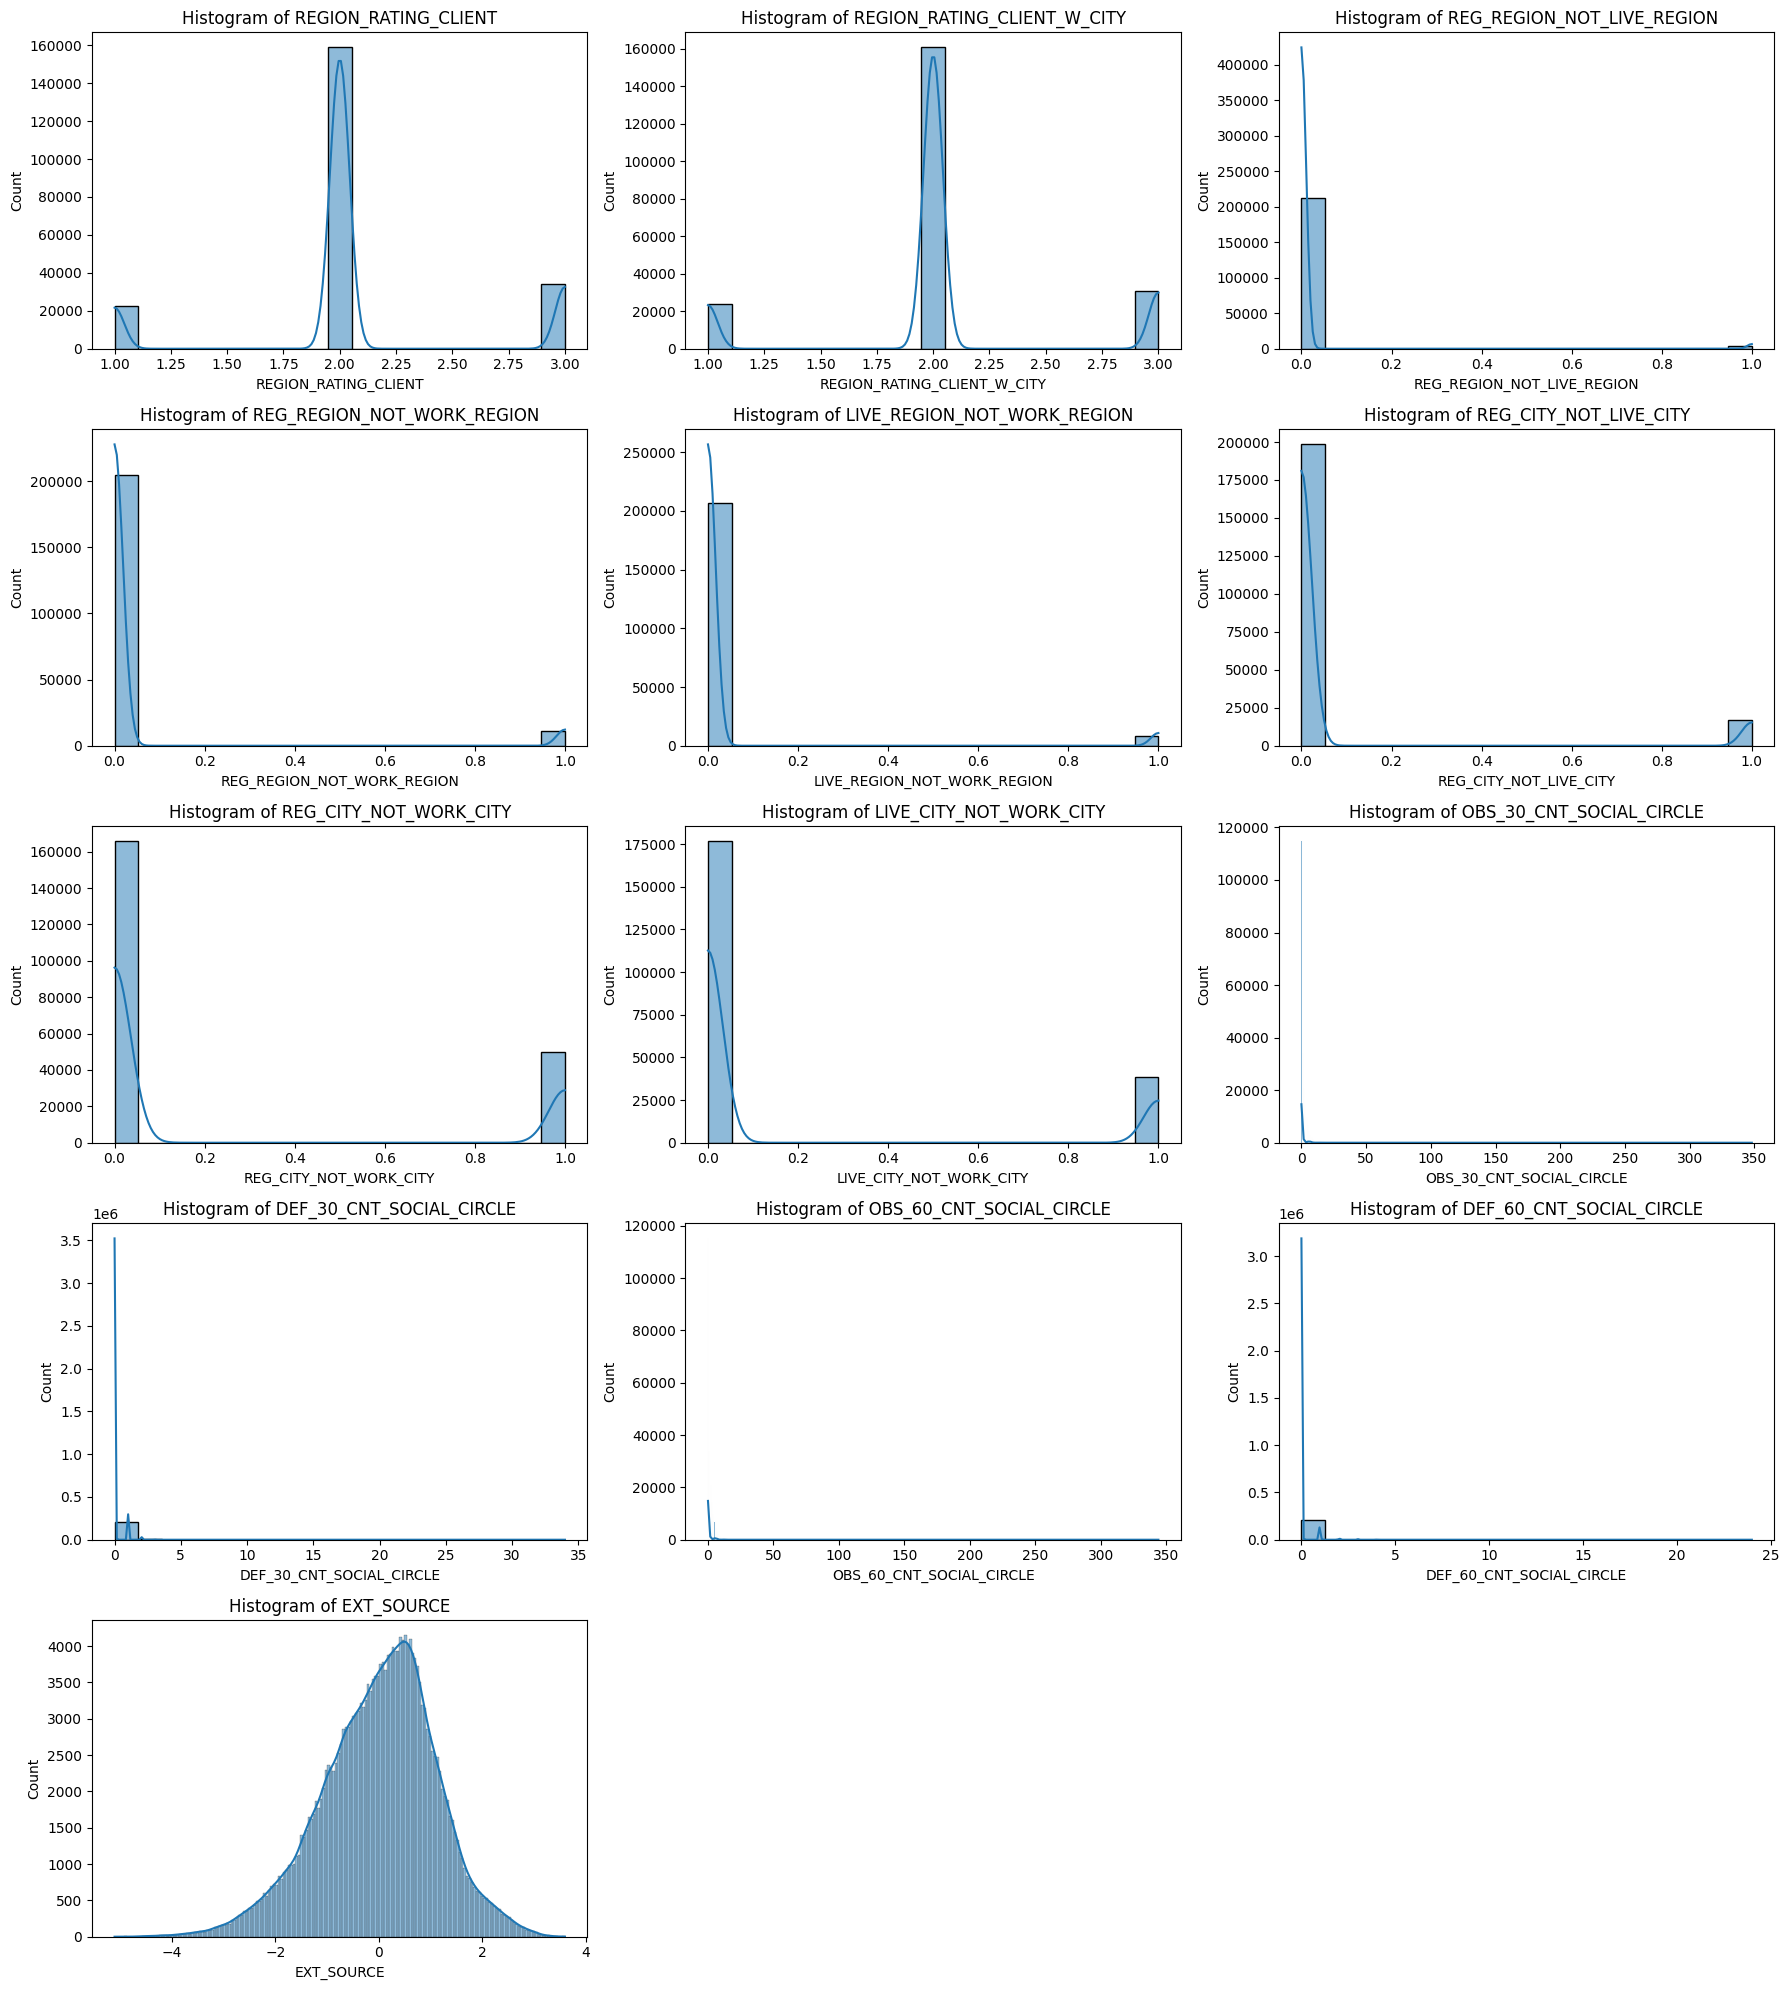

In [16]:
import math 
from scipy.stats import shapiro 

cols = df_sub.select_dtypes(include=["int64", "float64"]).columns
n_cols = len(cols)

# Thiết lập bố cục Subplots
n_rows = math.ceil(n_cols / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4 * n_rows))
axes = axes.flatten() 

# Biến đếm để theo dõi chỉ mục của subplot hiện tại
i = 0

for col in df_sub.select_dtypes(include=["int64", "float64"]).columns:
    
    # Vẽ histogram lên subplot thứ i
    sns.histplot(df_sub[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    
    # Tăng chỉ mục của subplot cho lần lặp tiếp theo
    i += 1
    
    skewness = df_sub[col].skew()
    kurtosis = df_sub[col].kurtosis()
    print(f"{col}: Skew={skewness:.2f}, Kurtosis={kurtosis:.2f}")
    
    # Kiểm tra normality (Shapiro test nếu số lượng < 5000)
    data_to_test = df_sub[col].dropna()
    if data_to_test.shape[0] < 5000 and data_to_test.shape[0] > 3:
        stat, p = shapiro(data_to_test)
        print(f"Shapiro-Wilk p-value: {p:.4f}")
    print('-'*40)

# Xử lý các Axes thừa (nếu n_cols là số lẻ)
for j in range(i, n_rows * 3):
    fig.delaxes(axes[j])

# Tối ưu hóa layout và hiển thị tất cả
plt.tight_layout()
plt.show()

In [35]:
df_train["REGION_RATING_CLIENT"].value_counts(dropna=False)

REGION_RATING_CLIENT
2    158836
3     33903
1     22519
Name: count, dtype: int64

In [38]:
df_train["REG_REGION_NOT_LIVE_REGION"].value_counts(dropna=False)

REG_REGION_NOT_LIVE_REGION
0    211986
1      3272
Name: count, dtype: int64

In [45]:
df_train[df_train["OBS_30_CNT_SOCIAL_CIRCLE"] == 348.0][["OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
175275,348.0,344.0,34.0,24.0


In [ ]:
df_train["SOCIAL_CIRCLE"].value_counts(dropna=False)

OBS_30_CNT_SOCIAL_CIRCLE
0.0      114671
1.0       33964
2.0       20983
3.0       14359
4.0        9962
5.0        6667
6.0        4471
7.0        3080
8.0        2071
9.0        1416
10.0        952
NaN         712
11.0        600
12.0        464
13.0        273
14.0        180
15.0        122
16.0         94
17.0         65
18.0         32
19.0         30
21.0         22
20.0         20
22.0         17
23.0          8
24.0          6
27.0          5
25.0          5
26.0          2
28.0          1
47.0          1
30.0          1
348.0         1
29.0          1
Name: count, dtype: int64

### * Check và xử lý outliers (IQR)

Vẽ boxplot cho từng biến số để xác định outliers. Sử dụng phương pháp IQR để tính ngưỡng và đếm số lượng outlier.

REGION_RATING_CLIENT: Số outlier = 56422 (26.21%)
----------------------------------------
REGION_RATING_CLIENT_W_CITY: Số outlier = 54627 (25.38%)
----------------------------------------
REG_REGION_NOT_LIVE_REGION: Số outlier = 3272 (1.52%)
----------------------------------------
REG_REGION_NOT_WORK_REGION: Số outlier = 10933 (5.08%)
----------------------------------------
LIVE_REGION_NOT_WORK_REGION: Số outlier = 8700 (4.04%)
----------------------------------------
REG_CITY_NOT_LIVE_CITY: Số outlier = 16817 (7.81%)
----------------------------------------
REG_CITY_NOT_WORK_CITY: Số outlier = 49636 (23.06%)
----------------------------------------
LIVE_CITY_NOT_WORK_CITY: Số outlier = 38653 (17.96%)
----------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE: Số outlier = 13940 (6.48%)
----------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE: Số outlier = 25397 (11.80%)
----------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE: Số outlier = 13661 (6.35%)
---

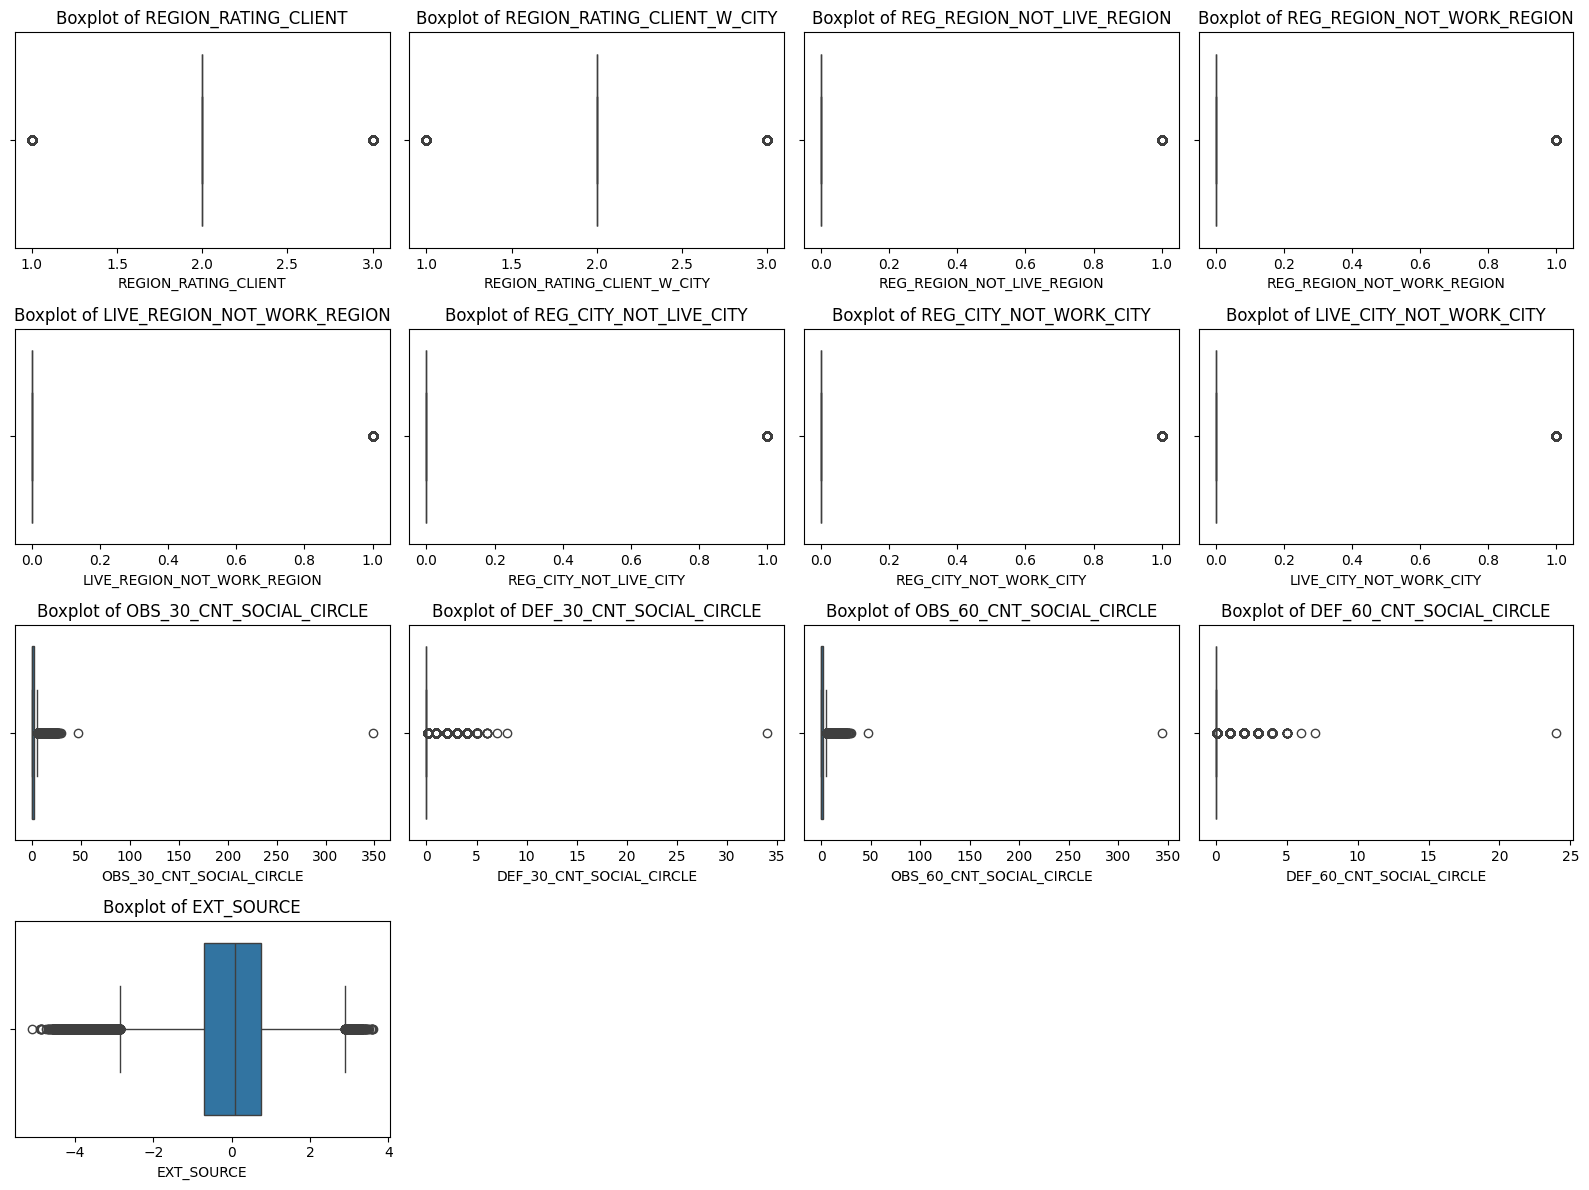

In [17]:
n_rows = math.ceil(n_cols / 4) 
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 3 * n_rows))
axes = axes.flatten() # Làm phẳng mảng axes để dễ truy cập

# Biến đếm để theo dõi chỉ mục của subplot hiện tại
i = 0

for col in cols:
    # Vẽ Boxplot lên subplot thứ i. Dùng sns.boxplot(x=..., ax=...)
    sns.boxplot(x=df_sub[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col) # Đặt tên trục X
    
    # Tăng chỉ mục của subplot
    i += 1
    # Tính toán IQR và xác định outlier
    q1 = df_sub[col].quantile(0.25)
    q3 = df_sub[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # Lấy ra các giá trị ngoại lai
    outliers = df_sub[(df_sub[col] < lower) | (df_sub[col] > upper)][col]
    outlier_count = outliers.shape[0]
    
    # Tính tỷ lệ phần trăm
    # Đảm bảo mẫu số không rỗng (nếu cột không có giá trị NaN thì shape[0] là đủ)
    if df_sub[col].dropna().shape[0] > 0:
        outlier_pct = outlier_count / df_sub[col].dropna().shape[0] * 100
        print(f"{col}: Số outlier = {outlier_count} ({outlier_pct:.2f}%)")
    else:
         print(f"{col}: Không có dữ liệu để tính toán outlier.")
        
    print('-'*40)

# 3. Xử lý các Axes thừa (nếu tổng số cột là số lẻ)
# Bắt đầu từ chỉ mục i (đã tăng sau lần lặp cuối) đến cuối mảng axes
for j in range(i, n_rows * 4):
    fig.delaxes(axes[j])

# 4. Tối ưu hóa layout và hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()

### * Visualize quan hệ các features với target label

Trực quan hóa mối quan hệ giữa từng biến với nhãn mục tiêu (TARGET). Sử dụng boxplot cho biến số, countplot cho biến danh mục. Việc này giúp phát hiện các biến có phân phối khác biệt giữa các nhóm target, hỗ trợ lựa chọn feature cho mô hình.

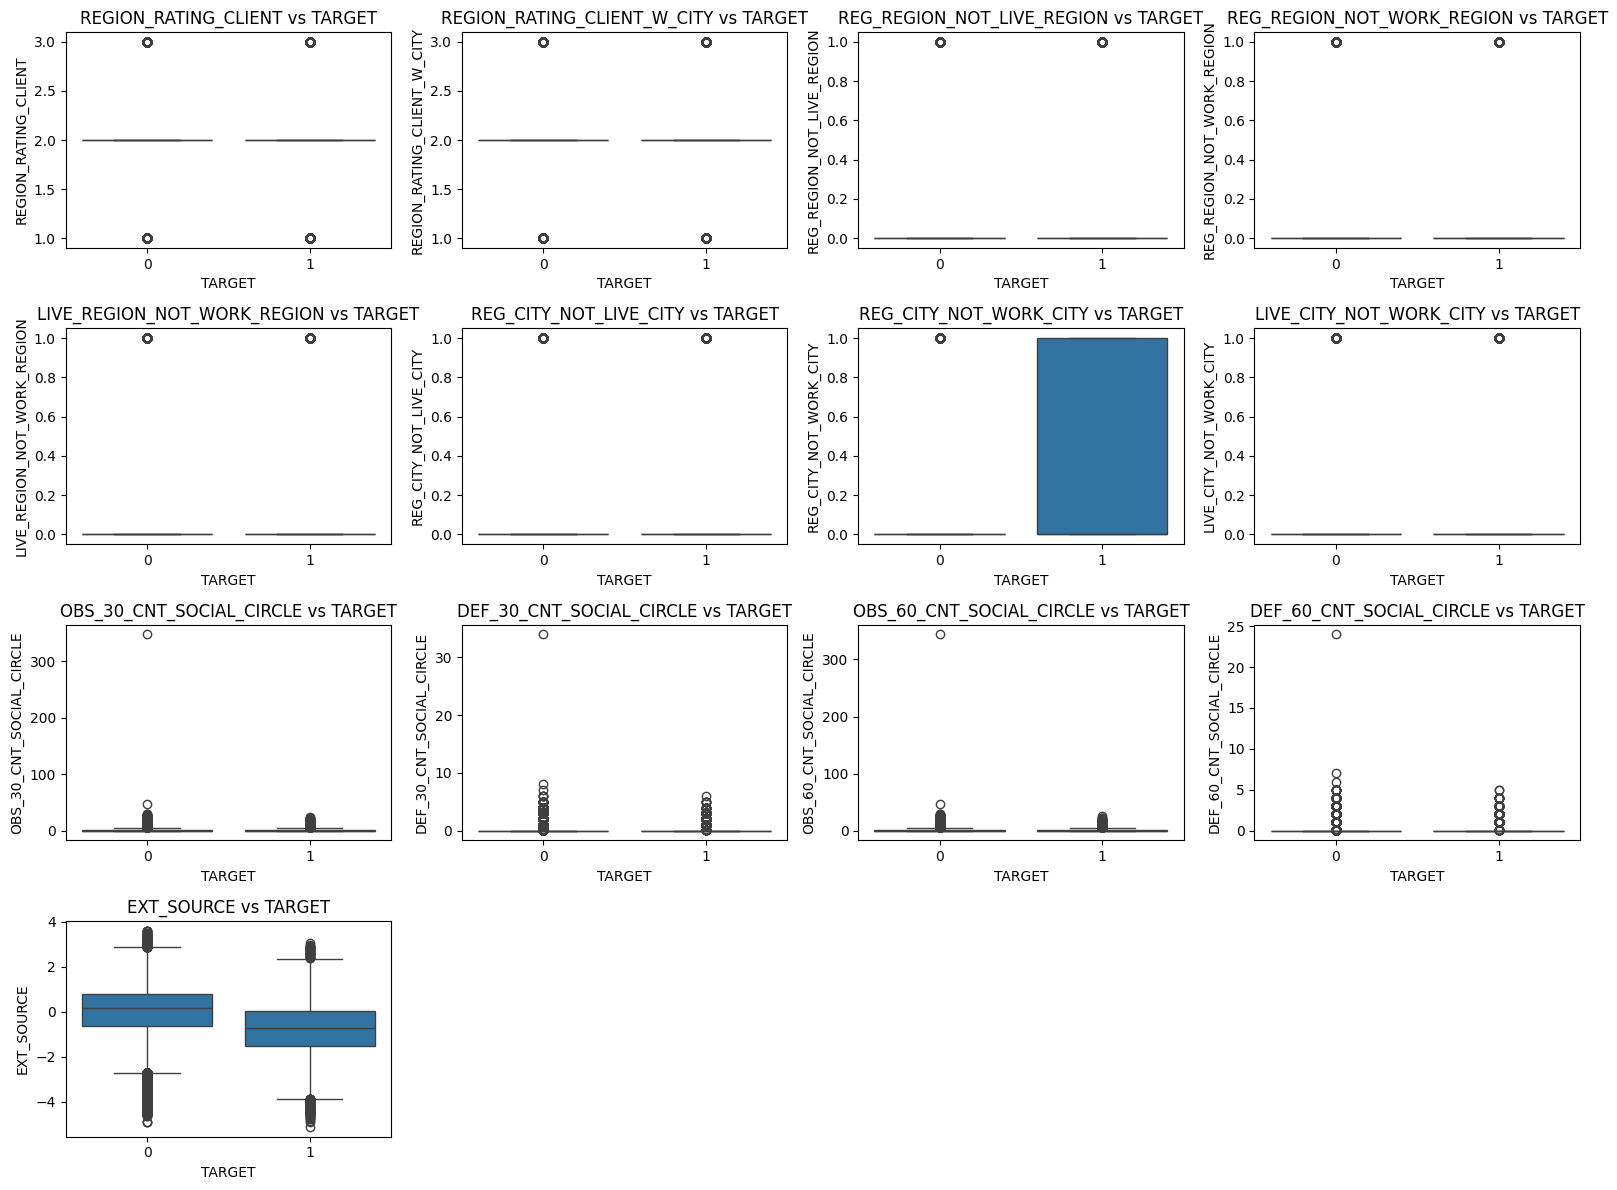

In [18]:
df_sub['TARGET'] = df_train['TARGET']

n_rows = math.ceil(n_cols / 4) 
# Tạo Figure và Axes. figsize có thể điều chỉnh
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 3 * n_rows))
axes = axes.flatten() 

# Biến đếm để theo dõi chỉ mục của subplot hiện tại
i = 0

for col in cols:
    # Vẽ Boxplot lên subplot thứ i
    sns.boxplot(x=df_sub['TARGET'], y=df_sub[col], ax=axes[i])
    axes[i].set_title(f'{col} vs TARGET')
    axes[i].set_xlabel('TARGET')
    axes[i].set_ylabel(col)
    
    # Tăng chỉ mục của subplot
    i += 1
    
# Xử lý các Axes thừa (nếu tổng số cột là số lẻ)
for j in range(i, n_rows * 4):
    fig.delaxes(axes[j])

# 3. Tối ưu hóa layout và hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()


### * Correlation matrix giữa các biến số và TARGET

Tính toán và trực quan hóa ma trận tương quan giữa các biến số và TARGET. Phân nhóm các biến theo mức độ tương quan (mạnh, trung bình, yếu) để đánh giá khả năng dự báo và nguy cơ multicollinearity. Các biến có tương quan mạnh với TARGET thường hữu ích cho mô hình, nhưng cần kiểm tra multicollinearity giữa các biến số.

In [19]:
# Tính toán ma trận tương quan giữa biến số và TARGET
corr = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Phân nhóm biến theo mức độ tương quan với TARGET
target_corr = corr['TARGET'].drop('TARGET')
print("Biến có tương quan mạnh với TARGET (>|0.3|):", target_corr[abs(target_corr) > 0.3].index.tolist())
print("Biến có tương quan trung bình (0.1-0.3):", target_corr[(abs(target_corr) > 0.1) & (abs(target_corr) <= 0.3)].index.tolist())
print("Biến có tương quan yếu (<0.1):", target_corr[abs(target_corr) <= 0.1].index.tolist())

ValueError: could not convert string to float: 'Cash loans'

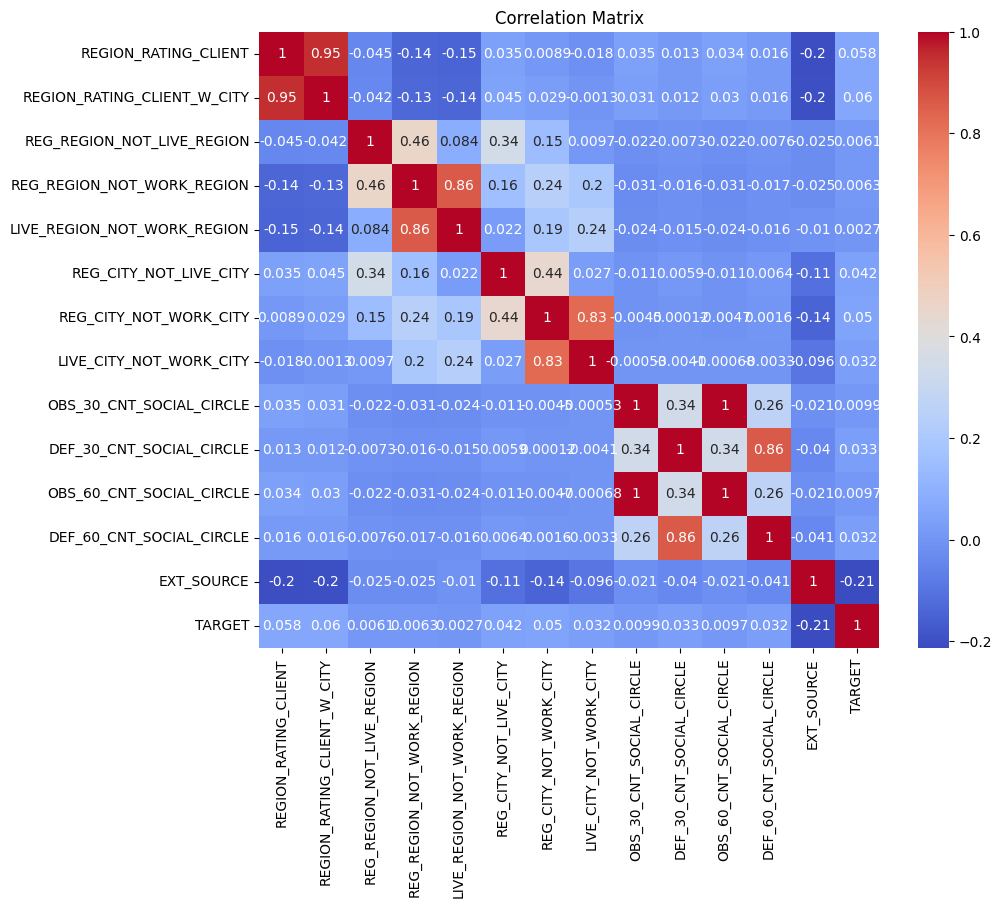

Biến có tương quan mạnh với TARGET (>|0.3|): []
Biến có tương quan trung bình (0.1-0.3): ['EXT_SOURCE']
Biến có tương quan yếu (<0.1): ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


In [ ]:
# Tính toán ma trận tương quan giữa biến số và TARGET
corr = df_sub[list(cols) + ['TARGET']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Phân nhóm biến theo mức độ tương quan với TARGET
target_corr = corr['TARGET'].drop('TARGET')
print("Biến có tương quan mạnh với TARGET (>|0.3|):", target_corr[abs(target_corr) > 0.3].index.tolist())
print("Biến có tương quan trung bình (0.1-0.3):", target_corr[(abs(target_corr) > 0.1) & (abs(target_corr) <= 0.3)].index.tolist())
print("Biến có tương quan yếu (<0.1):", target_corr[abs(target_corr) <= 0.1].index.tolist())